<a href="https://colab.research.google.com/github/PedroDubas/Kaggle_HousePrices/blob/master/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir /root/.kaggle
meu_json = '{"username":"kleyer","key":"b986abecaefe13f01f8073272b3c6f7e"}'
with open('/root/.kaggle/kaggle.json', 'w+') as f:
    f.write(meu_json)

A sintaxe do comando est  incorreta.


FileNotFoundError: ignored

In [11]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0%|          | 0.00/31.2k [00:00<?, ?B/s]
100%|##########| 31.2k/31.2k [00:00<00:00, 3.55MB/s]

  0%|          | 0.00/441k [00:00<?, ?B/s]
100%|##########| 441k/441k [00:00<00:00, 23.8MB/s]

  0%|          | 0.00/450k [00:00<?, ?B/s]
100%|##########| 450k/450k [00:00<00:00, 41.9MB/s]

  0%|          | 0.00/13.1k [00:00<?, ?B/s]
100%|##########| 13.1k/13.1k [00:00<00:00, 1.67MB/s]


In [0]:

dic = {"SalePrice": " the property's sale price in dollars. This is the target variable that you're trying to predict.",
       "MSSubClass": " The building class",
       "MSZoning": " The general zoning classification",
       "LotFrontage": " Linear feet of street connected to property",
       "LotArea": " Lot size in square feet",
       "Street": " Type of road access",
       "Alley": " Type of alley access",
       "LotShape": " General shape of property",
       "LandContour": " Flatness of the property",
       "Utilities": " Type of utilities available",
       "LotConfig": " Lot configuration",
       "LandSlope": " Slope of property",
       "Neighborhood": " Physical locations within Ames city limits",
       "Condition1": " Proximity to main road or railroad",
       "Condition2": " Proximity to main road or railroad (if a second is present)",
       "BldgType": " Type of dwelling",
       "HouseStyle": " Style of dwelling",
       "OverallQual": " Overall material and finish quality",
       "OverallCond": " Overall condition rating",
       "YearBuilt": " Original construction date",
       "YearRemodAdd": " Remodel date",
       "RoofStyle": " Type of roof",
       "RoofMatl": " Roof material",
       "Exterior1st": " Exterior covering on house",
       "Exterior2nd": " Exterior covering on house (if more than one material)",
       "MasVnrType": " Masonry veneer type",
       "MasVnrArea": " Masonry veneer area in square feet",
       "ExterQual": " Exterior material quality",
       "ExterCond": " Present condition of the material on the exterior",
       "Foundation": " Type of foundation",
       "BsmtQual": " Height of the basement",
       "BsmtCond": " General condition of the basement",
       "BsmtExposure": " Walkout or garden level basement walls",
       "BsmtFinType1": " Quality of basement finished area",
       "BsmtFinSF1": " Type 1 finished square feet",
       "BsmtFinType2": " Quality of second finished area (if present)",
       "BsmtFinSF2": " Type 2 finished square feet",
       "BsmtUnfSF": " Unfinished square feet of basement area",
       "TotalBsmtSF": " Total square feet of basement area",
       "Heating": " Type of heating",
       "HeatingQC": " Heating quality and condition",
       "CentralAir": " Central air conditioning",
       "Electrical": " Electrical system",
       "1stFlrSF": " First Floor square feet",
       "2ndFlrSF": " Second floor square feet",
       "LowQualFinSF": " Low quality finished square feet (all floors)",
       "GrLivArea": " Above grade (ground) living area square feet",
       "BsmtFullBath": " Basement full bathrooms",
       "BsmtHalfBath": " Basement half bathrooms",
       "FullBath": " Full bathrooms above grade",
       "HalfBath": " Half baths above grade",
       "Bedroom": " Number of bedrooms above basement level",
       "Kitchen": " Number of kitchens",
       "KitchenQual": " Kitchen quality",
       "TotRmsAbvGrd": " Total rooms above grade (does not include bathrooms)",
       "Functional": " Home functionality rating",
       "Fireplaces": " Number of fireplaces",
       "FireplaceQu": " Fireplace quality",
       "GarageType": " Garage location",
       "GarageYrBlt": " Year garage was built",
       "GarageFinish": " Interior finish of the garage",
       "GarageCars": " Size of garage in car capacity",
       "GarageArea": " Size of garage in square feet",
       "GarageQual": " Garage quality",
       "GarageCond": " Garage condition",
       "PavedDrive": " Paved driveway",
       "WoodDeckSF": " Wood deck area in square feet",
       "OpenPorchSF": " Open porch area in square feet",
       "EnclosedPorch": " Enclosed porch area in square feet",
       "3SsnPorch": " Three season porch area in square feet",
       "ScreenPorch": " Screen porch area in square feet",
       "PoolArea": " Pool area in square feet",
       "PoolQC": " Pool quality",
       "Fence": " Fence quality",
       "MiscFeature": " Miscellaneous feature not covered in other categories",
       "MiscVal": " $Value of miscellaneous feature",
       "MoSold": " Month Sold",
       "YrSold": " Year Sold",
       "SaleType": " Type of sale",
       "SaleCondition": " Condition of sale"
       }

In [0]:
import pandas as pd
import IPython
from IPython import display
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
import sklearn
import xgboost as xgb
from scipy.stats import norm, skew
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import time

from scipy import stats

import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))  # Limiting floats output to 2 decimal points

seed = 42

In [14]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train, test])
print(train.shape)
print(test.shape)
print(data.shape)

(1460, 81)
(1459, 80)
(2919, 81)


#Data Prep

##Data Missing

In [15]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.9966
MiscFeature,2814,0.9640
Alley,2721,0.9322
Fence,2348,0.8044
SalePrice,1459,0.4998
FireplaceQu,1420,0.4865
LotFrontage,486,0.1665
GarageFinish,159,0.0545
GarageCond,159,0.0545
GarageQual,159,0.0545


In [16]:
#Colocando o valor mais comum nas variaveis onde esta null
common_vars = ['Exterior1st', 'Exterior2nd', 'SaleType', 'Electrical', 'KitchenQual']
for var in common_vars:
    data[var] = data[var].fillna(data[var].mode()[0])

#Colocando o valor mais comum nas variaveis onde esta null
data['MSZoning'] = data.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "PoolQC"
    , 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu', 'MasVnrType', 'Utilities']:
    data[col] = data[col].fillna('None')

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2'
            , 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BsmtUnfSF', 'TotalBsmtSF'):
    data[col] = data[col].fillna(0)

data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
print('Features size:', data.shape)

data['Functional'] = data['Functional'].fillna('Typ')

Features size: (2919, 81)


In [17]:
# missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SalePrice,1459,0.4998
FullBath,0,0.0000
ExterCond,0,0.0000
ExterQual,0,0.0000
Exterior1st,0,0.0000
Exterior2nd,0,0.0000
Fence,0,0.0000
FireplaceQu,0,0.0000
Fireplaces,0,0.0000
Foundation,0,0.0000


##Dummies

In [18]:
categories = ['Street', 'Alley', 'LotConfig', 'LandSlope', 'LandContour', 'Utilities', 'LotShape', 'Neighborhood',
              'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
              'Exterior2nd',
              'MasVnrType', 'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Fence', 'MiscFeature',
              'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
              'SaleCondition']

one_hot = pd.get_dummies(data[categories])
one_hot.head()

,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
data = pd.concat([data, one_hot], axis=1)
for i in categories:
    data = data.drop(i, axis=1)
print(data.shape)
data.head()

(2919, 257)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,856,854,0,3,TA,No,706.0000,0.0000,1.0000,0.0000,...,0,0,0,1,0,0,0,0,1,0
1,1262,0,0,3,TA,Gd,978.0000,0.0000,0.0000,1.0000,...,0,0,0,1,0,0,0,0,1,0
2,920,866,0,3,TA,Mn,486.0000,0.0000,1.0000,0.0000,...,0,0,0,1,0,0,0,0,1,0
3,961,756,0,3,Gd,No,216.0000,0.0000,1.0000,0.0000,...,0,0,0,1,1,0,0,0,0,0
4,1145,1053,0,4,TA,Av,655.0000,0.0000,1.0000,0.0000,...,0,0,0,1,0,0,0,0,1,0


In [20]:
colunas_catg = data.select_dtypes(include='object').columns
for coluna in colunas_catg:
    print("-" * 5, ' ', coluna, ' ', '-' * 5)
    print(dic[coluna])
    print("Unique: ", data[coluna].unique())
    print("Na: ", data[coluna].isna().sum())
    print('\n')

-----   BsmtCond   -----
 General condition of the basement
Unique:  ['TA' 'Gd' 'None' 'Fa' 'Po']
Na:  0


-----   BsmtExposure   -----
 Walkout or garden level basement walls
Unique:  ['No' 'Gd' 'Mn' 'Av' 'None']
Na:  0


-----   BsmtQual   -----
 Height of the basement
Unique:  ['Gd' 'TA' 'Ex' 'None' 'Fa']
Na:  0


-----   ExterCond   -----
 Present condition of the material on the exterior
Unique:  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Na:  0


-----   ExterQual   -----
 Exterior material quality
Unique:  ['Gd' 'TA' 'Ex' 'Fa']
Na:  0


-----   FireplaceQu   -----
 Fireplace quality
Unique:  ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Na:  0


-----   GarageCond   -----
 Garage condition
Unique:  ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
Na:  0


-----   GarageQual   -----
 Garage quality
Unique:  ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
Na:  0


-----   HeatingQC   -----
 Heating quality and condition
Unique:  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
Na:  0


-----   KitchenQual   -----
 Kitchen quality
Unique:  ['Gd' 'TA' 'Ex' 'Fa

In [21]:
for coluna in colunas_catg:
    data[coluna] = pd.Categorical(data[coluna]).codes
data.shape

(2919, 257)

In [0]:
data = data.astype('float64')

In [0]:
# new features
data['ToTalSF'] = data['1stFlrSF'] + data['2ndFlrSF'] + data['TotalBsmtSF']
data['ToTalOuterSF'] = data['ToTalSF'] + data['GarageArea'] + data['LotArea']
data['Year'] = data['YearRemodAdd'] - data['YearBuilt']
data['ToTalSFQ'] = data['ToTalSF'] * data['OverallQual']

In [24]:
data_na = data.isnull().sum()
data_na = data_na[data_na > 0]
data_na.sort_values(ascending=False)

SalePrice    1459
dtype: int64

In [25]:
#Skew para as variaveis continuas
continuous = ['LotFrontage', 'LotArea', 'MasVnrArea', 'YearBuilt', 'YearRemodAdd', 'ToTalSF', 'ToTalOuterSF', 'Year',
              'ToTalSFQ',
              'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt',
              'LowQualFinSF', 'GrLivArea', 'GarageArea', 'MiscVal', 'YrSold']

skew_features = data[continuous].apply(lambda x: skew(x.dropna()))
skewness = pd.DataFrame({"Skew": skew_features})
skewness

,Skew
LotFrontage,1.5057
LotArea,12.8224
MasVnrArea,2.6136
YearBuilt,-0.5998
YearRemodAdd,-0.4510
ToTalSF,1.5115
ToTalOuterSF,11.6401
Year,2.0637
ToTalSFQ,2.1423
BsmtFinSF1,1.4252


In [26]:
print("Variaveis mais importantes para SalePrice")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending=False, inplace=True)
print(corr.SalePrice[:15])
MostImportant = corr.SalePrice[:40].index
MostImportant = MostImportant.drop(['SalePrice'])

Variaveis mais importantes para SalePrice
SalePrice      1.0000
OverallQual    0.7910
GrLivArea      0.7086
GarageCars     0.6404
GarageArea     0.6234
TotalBsmtSF    0.6136
1stFlrSF       0.6059
FullBath       0.5607
TotRmsAbvGrd   0.5337
YearBuilt      0.5229
YearRemodAdd   0.5071
GarageYrBlt    0.4864
MasVnrArea     0.4775
Fireplaces     0.4669
BsmtFinSF1     0.3864
Name: SalePrice, dtype: float64


In [0]:
train = data.loc[data.SalePrice.notna()]
test = data.loc[data.SalePrice.isna()]

##Tratando Outliers

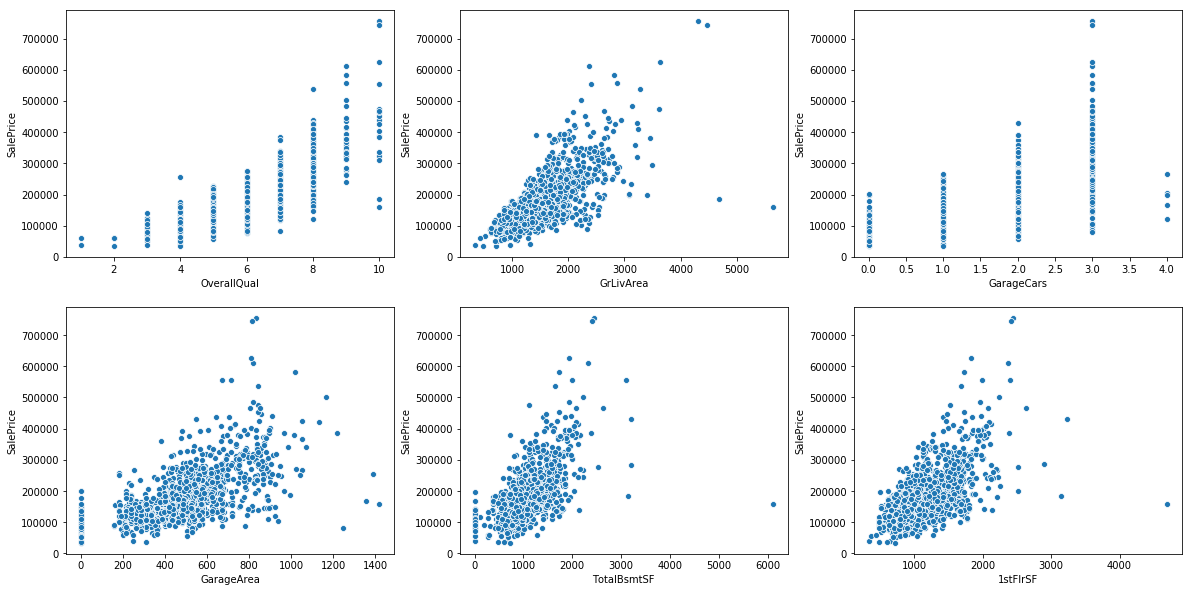

In [28]:
cols = corr.SalePrice.index[1:7]

plt.figure(figsize=(20, 10))
index = 231
for campo in cols:
    plt.subplot(index)
    sns.scatterplot(x=campo, y='SalePrice', data=train)
    index = index + 1

In [29]:
#data_bkp = train.copy()
train.shape

#data_bkp.shape

(1460, 261)

In [30]:
#Removendo outliers
cols = corr.SalePrice.index[1:7]

for coluna in cols:
    z = np.abs(stats.zscore(train[coluna]))
    train = train[(z < 2.6)]  # Bom numero para remover outliers
    z = np.abs(stats.zscore(train[coluna]))
    train = train[(z > -2.6)]  # Bom numero para remover outliers
    print(coluna)
    print(len(z))

train.shape

OverallQual
1437
GrLivArea
1414
GarageCars
1409
GarageArea
1400
TotalBsmtSF
1352
1stFlrSF
1339


(1339, 261)

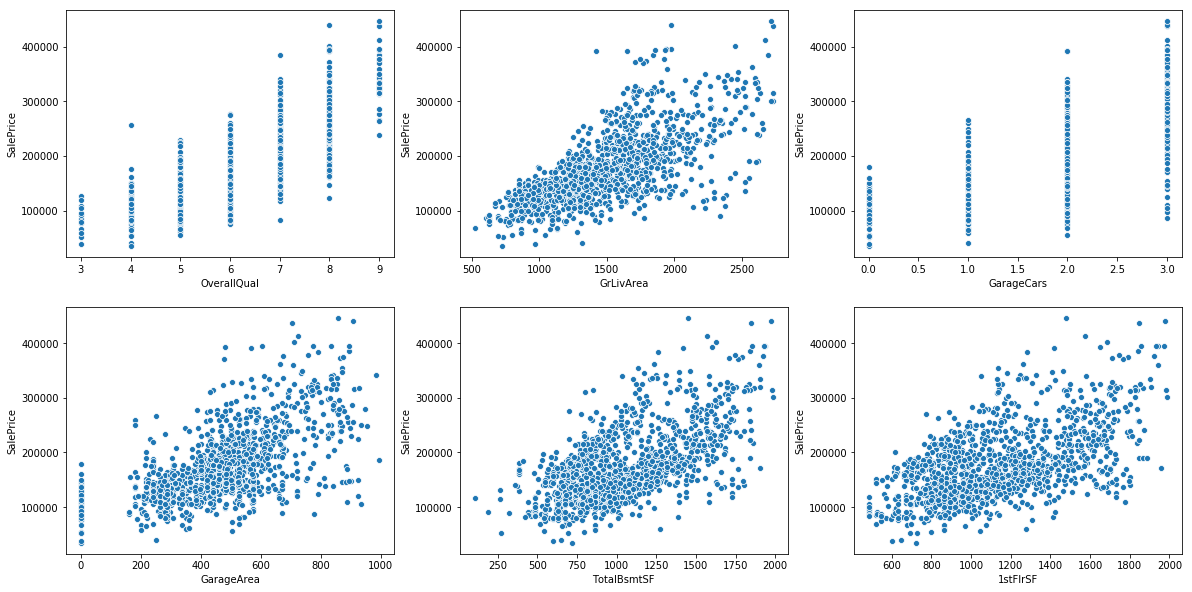

In [31]:
cols = corr.SalePrice.index[1:7]

plt.figure(figsize=(20, 10))
index = 231
for campo in cols:
    plt.subplot(index)
    sns.scatterplot(x=campo, y='SalePrice', data=train)
    index = index + 1

In [32]:
train['SalePrice'].describe()


count     1339.0000
mean    174063.4959
std      63894.2892
min      34900.0000
25%     130000.0000
50%     160000.0000
75%     205000.0000
max     446261.0000
Name: SalePrice, dtype: float64

Skewness: 1.079181
Kurtosis: 1.405098


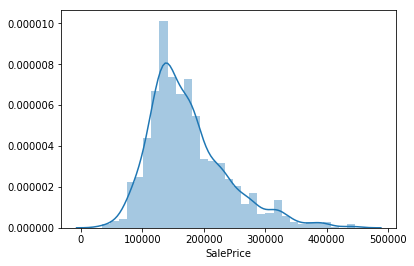

In [33]:
sns.distplot(train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())


 mu = 174063.50 and sigma = 63870.43



Text(0.5,0.98,'Before transformation')

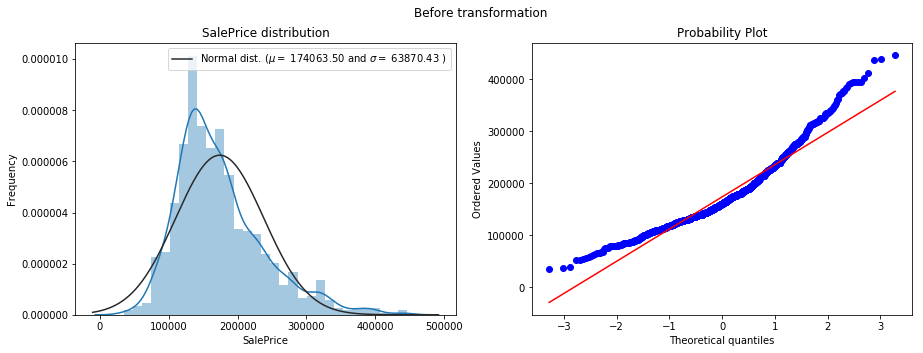

In [34]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')



 mu = 12.00 and sigma = 0.36



Text(0.5,0.98,'After transformation')

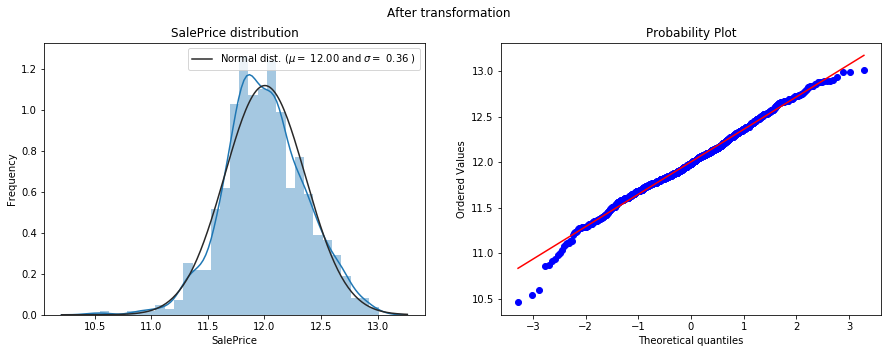

In [35]:
# Apply transformation
train.SalePrice = np.log1p(train.SalePrice )
# New prediction
y_train = train.SalePrice.values
y_train_orig = train.SalePrice


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('After transformation')

In [47]:
x = train.drop(['SalePrice', 'Id'], axis=1)
# Apply transformation *** SEGUNDA VEZ , SOMENTE PARA TESTES ***
#y = np.log(train["SalePrice"])
y = train["SalePrice"]

Envio_x = test.drop(['SalePrice', 'Id'], axis=1)
Envio_y = np.log(test["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(1004, 259)
(335, 259)


#Modelos

In [0]:
xgbmodel = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                            learning_rate=0.05, max_depth=3,
                            min_child_weight=1.7817, n_estimators=2200,
                            reg_alpha=0.4640, reg_lambda=0.8571,
                            subsample=0.5213, silent=1,
                            random_state=7, nthread=-1)

In [0]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

LRmodel = LinearRegression()
Ridgemodel = Ridge(alpha=0.2, max_iter=1000)
Lassomodel = Lasso(alpha=0.0005, max_iter=1000)
KRidgemodel = KernelRidge(alpha=0.2, degree=1)
SVRmodel = SVR()
GBmodel = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=2)
KNNmodel = KNeighborsRegressor(n_neighbors=3)
Adamodel = AdaBoostRegressor(n_estimators=100, learning_rate=0.1)
ENETmodel = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)
BRmodel = BayesianRidge()
RFmodel = RandomForestRegressor()
models = [LRmodel, Ridgemodel, Lassomodel, KRidgemodel, SVRmodel, GBmodel, KNNmodel, Adamodel, ENETmodel, BRmodel, RFmodel, xgbmodel]

modelnames = ['LRmodel', 'Ridgemodel', 'Lassomodel', 'KRidgemodel', 'SVRmodel', 'GBmodel', 'KNNmodel', 'Adamodel',
              'ENETmodel',
              'BRmodel', 'RFmodel', 'xgbmodel']


In [0]:
resultado = pd.DataFrame(columns=['Modelo', 'RMSE'])
for i in range(len(models)):
    score = np.sqrt(-cross_val_score(models[i], X_train, y_train, scoring='neg_mean_squared_error', cv=5))
    resultado = resultado.append({'Modelo': modelnames[i], 'RMSE': score.mean()}, ignore_index=True)

###Verificando qual modelo performa melhor com a base

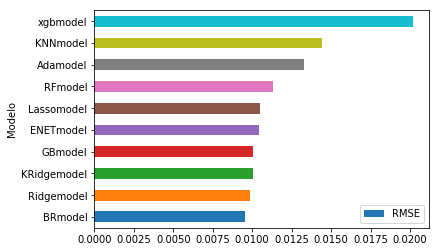

In [49]:
resultado.sort_values(by='RMSE', ascending=True)[:-2].plot.barh(x='Modelo', y='RMSE', rot=0)

In [50]:
resultado.sort_values
#0       LRmodel 591.7211
#1    Ridgemodel   0.1155
#2    Lassomodel   0.1119
#3   KRidgemodel   0.1157
#4      SVRmodel   0.3541
#5       GBmodel   0.1185
#6      KNNmodel   0.1712
#7      Adamodel   0.1551
#8     ENETmodel   0.1115
#9       BRmodel   0.1122
#10      RFmodel   0.1376
#11     xgbmodel   0.1123>

## ** 2 VEZES **
#0       LRmodel 45.1396
#1    Ridgemodel  0.0099
#2    Lassomodel  0.0105
#3   KRidgemodel  0.0100
#4      SVRmodel  0.0394
#5       GBmodel  0.0101
#6      KNNmodel  0.0145
#7      Adamodel  0.0132
#8     ENETmodel  0.0105
#9       BRmodel  0.0096
#10      RFmodel  0.0117
#11     xgbmodel  0.0202>

<bound method DataFrame.sort_values of          Modelo      RMSE
0       LRmodel 1229.5683
1    Ridgemodel    0.0099
2    Lassomodel    0.0105
3   KRidgemodel    0.0100
4      SVRmodel    0.0394
5       GBmodel    0.0101
6      KNNmodel    0.0145
7      Adamodel    0.0133
8     ENETmodel    0.0105
9       BRmodel    0.0096
10      RFmodel    0.0113
11     xgbmodel    0.0202>

##Lasso Tunning

In [70]:
Lasso_Parm = ({'alpha': np.arange(0.00001, 0.001, 0.000015)})
# Lasso_Parm=({'alpha': [0.00026500000000000004]})
Lassomodel = Lasso(max_iter=2000)
LassoGSV = GridSearchCV(Lassomodel, Lasso_Parm, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=4)
LassoGSV.fit(X_train, y_train)
print(LassoGSV.best_params_)
print('-' * 25)
print(np.sqrt(-LassoGSV.best_score_))
# {'alpha': 0.00026500000000000004}
#0.11076470854962701

Fitting 10 folds for each of 66 candidates, totalling 660 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.5min


KeyboardInterrupt: ignored

##ElasticNet Tunning

In [52]:
# Elastic_Parm=({"alpha": np.arange(0.001,0.01,0.001),"l1_ratio": np.arange(0.0, 1.0, 0.1)})
Elastic_Parm = ({'alpha': [0.000985], 'l1_ratio': [0.30000000000000004]})
ElasticModel = ElasticNet(max_iter=9000)
ElasticGSV = GridSearchCV(ElasticModel, Elastic_Parm, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=4)
ElasticGSV.fit(X_train, y_train)
print(ElasticGSV.best_params_)
print('-' * 25)
print(np.sqrt(-ElasticGSV.best_score_))
# {'alpha': 0.000985, 'l1_ratio': 0.30000000000000004}
# 0.11087715354184403

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   10.3s finished


{'alpha': 0.000985, 'l1_ratio': 0.30000000000000004}
-------------------------
0.010308205987132977


##BayesianRidge Tunning

In [53]:
# BR_Parm=({'n_iter':[1000],'alpha_1':np.arange(0.0000001,0.0001,0.00001),'alpha_2':np.arange(0.0000001,0.0001,0.00001)})
BR_Parm = ({'alpha_1': [3.0100000000000003e-05], 'alpha_2': [1e-07], 'n_iter': [1000]})
BRModel = BayesianRidge()
BRGSV = GridSearchCV(BRModel, BR_Parm, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
BRGSV.fit(X_train, y_train)
print(BRGSV.best_params_)
print('-' * 25)
print(np.sqrt(-BRGSV.best_score_))
# {'alpha_1': 3.0100000000000003e-05, 'alpha_2': 1e-07, 'n_iter': 1000}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'alpha_1': 3.0100000000000003e-05, 'alpha_2': 1e-07, 'n_iter': 1000}
-------------------------
0.009586263370188816


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.1s finished


##XBG Tunning

In [56]:
XBG_Parm = ({'colsample_bytree': [0.4603], 'gamma': [0.0468],
             'learning_rate': [0.05], 'max_depth': [3],
             'min_child_weight': [1.7817], 'n_estimators': [2200],
             'reg_alpha': [0.4640], 'reg_lambda': [0.8571],
             'subsample': [0.5213], 'silent': [1],
             'random_state': [7], 'nthread': [-1]})
XBGmodel = xgb.XGBRegressor()
XBGGSV = GridSearchCV(XBGmodel, XBG_Parm, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
XBGGSV.fit(X_train, y_train)
print(XBGGSV.best_params_)
print('-' * 25)
print(np.sqrt(-XBGGSV.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   21.9s finished


{'colsample_bytree': 0.4603, 'gamma': 0.0468, 'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 1.7817, 'n_estimators': 2200, 'nthread': -1, 'random_state': 7, 'reg_alpha': 0.464, 'reg_lambda': 0.8571, 'silent': 1, 'subsample': 0.5213}
-------------------------
0.02020973536168626


##Ridge Tunning

In [57]:
Ridge_Parm = ({'alpha': np.arange(1, 10, 0.1)})
RidgeModel = Ridge(max_iter=9000)
RidgeGSV = GridSearchCV(RidgeModel, Ridge_Parm, scoring='neg_mean_squared_error', cv=10, verbose=1, n_jobs=4)
RidgeGSV.fit(X_train, y_train)
print(RidgeGSV.best_params_)
print('-' * 25)
print(np.sqrt(-RidgeGSV.best_score_))
# {'alpha': 0.1}
# 0.1100989359491473

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=4)]: Done  78 tasks      | elapsed:    3.5s


{'alpha': 4.200000000000003}
-------------------------
0.009302275247194555


[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    8.5s finished


##KernelRidge Tunning

In [58]:
# K_Ridge_Parm=({"alpha": np.arange(0.1,3,0.05), 'degree':[1,2,3,4]})
K_Ridge_Parm = ({'alpha': [2.950000000000001], 'degree': [1]})
K_RidgeModel = KernelRidge()
K_RidgeGSV = GridSearchCV(K_RidgeModel, K_Ridge_Parm, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
K_RidgeGSV.fit(X_train, y_train)
print(K_RidgeGSV.best_params_)
print('-' * 25)
print(np.sqrt(-K_RidgeGSV.best_score_))
# {'alpha': 2.950000000000001, 'degree': 1}

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'alpha': 2.950000000000001, 'degree': 1}
-------------------------
0.009606375747860389


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    3.1s finished


In [59]:
print(resultado.sort_values(by='RMSE', ascending=True)[:6])
print(np.sqrt(-BRGSV.best_score_))
print(np.sqrt(-ElasticGSV.best_score_))
print(np.sqrt(-LassoGSV.best_score_))
print(np.sqrt(-XBGGSV.best_score_))
print(np.sqrt(-RidgeGSV.best_score_))
print(np.sqrt(-K_RidgeGSV.best_score_))

        Modelo   RMSE
9      BRmodel 0.0096
1   Ridgemodel 0.0099
3  KRidgemodel 0.0100
5      GBmodel 0.0101
8    ENETmodel 0.0105
2   Lassomodel 0.0105
0.009586263370188816
0.010308205987132977
0.00944220468003841
0.02020973536168626
0.009302275247194555
0.009606375747860389


In [0]:
xgb2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                        learning_rate=0.05, max_depth=3,
                        min_child_weight=1.7817, n_estimators=2200,
                        reg_alpha=0.4640, reg_lambda=0.8571,
                        subsample=0.5213, silent=1,
                        random_state=7, nthread=-1)

In [62]:
Lassopredtr = LassoGSV.predict(X_train)
ENETpredtr = ElasticGSV.predict(X_train)
BRpredtr = BRGSV.predict(X_train)
xgbpredtr = XBGGSV.predict(X_train)
Ridgepredtr = RidgeGSV.predict(X_train)
KRidgepredtr = K_RidgeGSV.predict(X_train)

featuresTreino = pd.DataFrame(
    {"ENET": ENETpredtr, "KR": KRidgepredtr, "Lasso": Lassopredtr, 'Ridge': Ridgepredtr, "BR": BRpredtr,
     'XGB': xgbpredtr})
featuresTreino.head()

,ENET,KR,Lasso,Ridge,BR,XGB
0,2.5071,2.5050,2.5076,2.5076,2.5079,2.4974
1,2.4820,2.4853,2.4863,2.4860,2.4862,2.4868
2,2.5447,2.5434,2.5456,2.5458,2.5462,2.5020
3,2.4318,2.4270,2.4287,2.4284,2.4289,2.4626
4,2.5061,2.5067,2.5057,2.5059,2.5058,2.4988


In [63]:
# stacking 2nd camada do Gradient boosting
score = np.sqrt(-cross_val_score(xgb2, featuresTreino, y_train, scoring='neg_mean_squared_error', cv=5))
print("Treino", "rmse: ", score.mean())

Treino rmse:  0.017083612974941008


In [64]:
Lassopredtr = LassoGSV.predict(X_test)
ENETpredtr = ElasticGSV.predict(X_test)
BRpredtr = BRGSV.predict(X_test)
xgbpredtr = XBGGSV.predict(X_test)
Ridgepredtr = RidgeGSV.predict(X_test)
KRidgepredtr = K_RidgeGSV.predict(X_test)

featuresTeste = pd.DataFrame(
    {"ENET": ENETpredtr, "KR": KRidgepredtr, "Lasso": Lassopredtr, 'Ridge': Ridgepredtr, "BR": BRpredtr,
     'XGB': xgbpredtr})
featuresTeste.head()

,ENET,KR,Lasso,Ridge,BR,XGB
0,2.4526,2.4557,2.4547,2.4550,2.4544,2.4671
1,2.4826,2.4777,2.4778,2.4773,2.4775,2.4839
2,2.5000,2.4992,2.5004,2.4995,2.4998,2.5003
3,2.5029,2.5052,2.5058,2.5047,2.5037,2.4956
4,2.5055,2.5105,2.5112,2.5110,2.5089,2.5044


In [65]:
score = np.sqrt(-cross_val_score(xgb2, featuresTeste, y_test, scoring='neg_mean_squared_error', cv=5))
print("Teste", "rmse: ", score.mean())

Teste rmse:  0.026888698885554896


#Envio

##Envio 2 Camadas

In [66]:
Lassopredtr = LassoGSV.predict(Envio_x)
ENETpredtr = ElasticGSV.predict(Envio_x)
BRpredtr = BRGSV.predict(Envio_x)
xgbpredtr = XBGGSV.predict(Envio_x)
Ridgepredtr = RidgeGSV.predict(Envio_x)
KRidgepredtr = K_RidgeGSV.predict(Envio_x)

featuresEnvio = pd.DataFrame(
    {"ENET": ENETpredtr, "KR": KRidgepredtr, "Lasso": Lassopredtr, 'Ridge': Ridgepredtr, "BR": BRpredtr,
     'XGB': xgbpredtr})
featuresEnvio.head()

xgb2.fit(featuresTreino, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1.7817, missing=None,
       n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
       scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
       verbosity=1)

In [67]:
predictions = xgb2.predict(featuresEnvio)
#predictions = np.exp(predictions)
predictions = np.expm1(predictions)
print(predictions.shape)

(1459,)


In [0]:
results = pd.DataFrame({"Id": test["Id"].astype('Int32'), "SalePrice": predictions})

results.to_csv("House_v1.csv", index=False)

##Envio RidgeGSV

In [70]:
predictions = RidgeGSV.predict(Envio_x)
#predictions = np.exp(predictions)
predictions = np.expm1(predictions)
print(predictions.shape)

(1459,)


In [0]:
results = pd.DataFrame({"Id": test["Id"].astype('Int32'), "SalePrice": predictions})
results.to_csv("House_v2.csv", index=False)

##Envio ElasticGSV

In [73]:
ElasticGSV.fit(x, y)
predictions = ElasticGSV.predict(Envio_x)
#predictions = np.exp(predictions) #### USAR O np.expm1 PARA O Logn1
predictions = np.expm1(predictions)
print(predictions.shape)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   20.4s finished


(1459,)


In [0]:
results = pd.DataFrame({"Id": test["Id"].astype('Int32'), "SalePrice": predictions})
results.to_csv("House_V3.csv", index=False)